# Drug Consumption

It is a machine learning project and have used a dataset about drug consumption from UCI - Machine Learning Repository. The original study and dataset can be accessed with the link here. 

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

### Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

### Loading necessary packages

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

### It's necessary to create a columns list to add to the dataset

In [3]:
col = ['id','age','gender','education','country','ethnicity','nscore','escore','oscore','ascore','cscore','impulsive',
       'ss','alcohol','amphet','amyl','benzos','caff','cannabis','choc','coke','crack','ecstasy','heroin','ketamine',
       'legalh','lsd','meth','mushrooms','nicotine','semer','vsa']

In [4]:
df = pd.read_csv('drug_consumption.csv',header=None)
df.columns = col

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1885 non-null   int64  
 1   age        1885 non-null   float64
 2   gender     1885 non-null   float64
 3   education  1885 non-null   float64
 4   country    1885 non-null   float64
 5   ethnicity  1885 non-null   float64
 6   nscore     1885 non-null   float64
 7   escore     1885 non-null   float64
 8   oscore     1885 non-null   float64
 9   ascore     1885 non-null   float64
 10  cscore     1885 non-null   float64
 11  impulsive  1885 non-null   float64
 12  ss         1885 non-null   float64
 13  alcohol    1885 non-null   object 
 14  amphet     1885 non-null   object 
 15  amyl       1885 non-null   object 
 16  benzos     1885 non-null   object 
 17  caff       1885 non-null   object 
 18  cannabis   1885 non-null   object 
 19  choc       1885 non-null   object 
 20  coke    

In [6]:
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [7]:
df.isnull().sum()

id           0
age          0
gender       0
education    0
country      0
ethnicity    0
nscore       0
escore       0
oscore       0
ascore       0
cscore       0
impulsive    0
ss           0
alcohol      0
amphet       0
amyl         0
benzos       0
caff         0
cannabis     0
choc         0
coke         0
crack        0
ecstasy      0
heroin       0
ketamine     0
legalh       0
lsd          0
meth         0
mushrooms    0
nicotine     0
semer        0
vsa          0
dtype: int64

In [8]:
# Creating a function to adjusting variables about drugs (targets):
def drog_cat(x):
    if x == 'CL0' or x == 'CL1':
        return 0
    else:
        return 1

In [9]:
# Creating a function to put the categories in the variable:
def var_age(x):
    if x <= -0.95197:
        return '18-24'
    elif x <= -0.07854:
        return '25-34'
    elif x <= 0.49788:
        return '35-44'
    elif x <= 1.09449:
        return '45-54'
    elif x <= 1.82213:
        return '55-64'
    elif x <= 2.59171:
        return '65+'

In [10]:
def var_gender(x):
    if x <= -0.48246:
        return 'Male'
    elif x <= 0.48246:
        return 'Female'

In [11]:
def var_education(x):
    if x <= -2.43591:
        return 'Left school before 16 years'
    elif x <= -1.73790:
        return 'Left school at 16 years'
    elif x <= -1.43719:
        return 'Left school at 17 years'
    elif x <= -1.22751:
        return 'Left school at 18 years'
    elif x <= -0.61113:
        return 'Some college or university, no certificate or degree'
    elif x <= -0.05921:
        return 'Professional certificate/ diploma'
    elif x <= 0.45468:
        return 'University degree'
    elif x <= 1.16365:
        return 'Masters degree'
    elif x <= 1.98437:
        return 'Doctorate degree'

In [12]:
def var_country(x):
    if x <= -0.57009:
        return 'USA'
    elif x <= -0.46841:
        return 'New Zealand'
    elif x <= -0.28519:
        return 'Other'
    elif x <= -0.09765:
        return 'Australia'
    elif x <= 0.21128:
        return 'Republic of Ireland'
    elif x <= 0.24923:
        return 'Canada'
    elif x <= 0.96082:
        return 'UK'

In [13]:
def var_ethnicity(x):
    if x <= -1.10702:
        return 'Black'
    elif x <= -0.50212:
        return 'Asian'
    elif x <= -0.31685:
        return 'White'
    elif x <= -0.22166:
        return 'Mixed-White/Black'
    elif x <= 0.11440:
        return 'Other'
    elif x <= 0.12600:
        return 'Mixed-White/Asian'
    elif x <= 1.90725:
        return 'Mixed-Black/Asian'


In [14]:
# Transform categorical variables
df['age_'] = df['age'].apply(var_age)
df['gender_'] = df['gender'].apply(var_gender)
df['education_'] = df['education'].apply(var_education)
df['country_'] = df['country'].apply(var_country)
df['ethnicity_'] = df['ethnicity'].apply(var_ethnicity)
df['amphet_'] = df['amphet'].apply(drog_cat)
df['amyl_'] = df['amyl'].apply(drog_cat)
df['benzos_'] = df['benzos'].apply(drog_cat)
df['coke_'] = df['coke'].apply(drog_cat)
df['crack_'] = df['crack'].apply(drog_cat)
df['ecstasy_'] = df['ecstasy'].apply(drog_cat)
df['heroin_'] = df['heroin'].apply(drog_cat)
df['ketamine_'] = df['ketamine'].apply(drog_cat)
df['lsd_'] = df['lsd'].apply(drog_cat)
df['meth_'] = df['meth'].apply(drog_cat)
df['cannabis_'] = df['cannabis'].apply(drog_cat)

In [16]:
df1.head()

,nscore,escore,oscore,ascore,cscore,impulsive,ss,age_,gender_,education_,...,amyl_,benzos_,coke_,crack_,ecstasy_,heroin_,ketamine_,lsd_,meth_,cannabis_
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,35-44,Female,Professional certificate/ diploma,...,0,1,0,0,0,0,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,25-34,Male,Doctorate degree,...,1,0,1,0,1,0,1,1,1,1
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,35-44,Male,Professional certificate/ diploma,...,0,0,0,0,0,0,0,0,0,1
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,18-24,Female,Masters degree,...,0,1,1,0,0,0,1,0,0,1
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,35-44,Female,Doctorate degree,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df1['class'] = df1['amphet_'] + df1['amyl_'] + df1['benzos_'] + df1['cannabis_'] + df1['coke_'] + df1['crack_'] + df1['ecstasy_'] + df1['heroin_'] + df1['ketamine_'] + df1['lsd_'] + df1['meth_']

In [20]:
def Class(x):
    if x > 0:
        return 1
    else:
        return 0

df1['class'] = df1['class'].apply(Class)

In [28]:
df1 = df1.drop(['amphet_','amyl_', 'benzos_', 'coke_', 'crack_','ecstasy_',
                'heroin_','ketamine_', 'lsd_', 'meth_', 'cannabis_'], axis=1)

In [29]:
df1.head()

,nscore,escore,oscore,ascore,cscore,impulsive,ss,age_,gender_,education_,country_,ethnicity_,class
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,1
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,25-34,Male,Doctorate degree,UK,White,1
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,35-44,Male,Professional certificate/ diploma,UK,White,1
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,18-24,Female,Masters degree,UK,White,1
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,35-44,Female,Doctorate degree,UK,White,1


In [30]:
X = df1.iloc[:,:-1].values

In [31]:
y = df1.iloc[:,-1].values

### Encoding categorical data - Dependent Variables

In [34]:
labelencoder_X = LabelEncoder()
X[:,7] = labelencoder_X.fit_transform(X[:,7])
X[:,8] = labelencoder_X.fit_transform(X[:,8])
X[:,9] = labelencoder_X.fit_transform(X[:,9])
X[:,10] = labelencoder_X.fit_transform(X[:,10])
X[:,11] = labelencoder_X.fit_transform(X[:,11])

In [36]:
X1 = X[:,0:7]
X2 = X[:,7:12]

In [39]:
onehotencoder = OneHotEncoder(sparse=False)
X2 = onehotencoder.fit_transform(X2)

In [41]:
X1 = pd.DataFrame(X1)
X2 = pd.DataFrame(X2)
X3 = pd.concat([X1,X2],axis=1)

In [45]:
# Feature Scaling
ss = StandardScaler()
X3 = ss.fit_transform(X3)

### Encoding categorical data - Independent Variables

In [47]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Spliting the dataset into training set and teste set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size = 0.3, random_state = 0)

In [53]:
# Fitting SVM to the training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [54]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [56]:
def Accuracy(classifier,X3, y):
    results = cross_val_predict(classifier, X3, y, cv = 10)
    return accuracy_score(y, results)

In [57]:
Accuracy(classifier, X3, y)

0.8122015915119364

In [58]:
results = cross_val_predict(classifier, X3, y, cv = 10)
class_values = [0,1]
print(classification_report(y, results, class_values))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       477
           1       0.86      0.89      0.88      1408

    accuracy                           0.81      1885
   macro avg       0.75      0.73      0.74      1885
weighted avg       0.81      0.81      0.81      1885



/home/neves/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [67]:
X_train[:,0:7]

array([[ 1.13521415, -1.63784957, -0.01882156, ..., -1.01690228,
         0.1943697 ,  0.79785693],
       [-1.33120047,  0.16830677,  0.72676744, ..., -1.52218777,
        -0.75297646,  0.79785693],
       [-0.67976411, -0.30101489, -1.1230178 , ..., -1.52218777,
         0.91587828, -0.22051931],
       ...,
       [ 1.72379481, -1.23508534, -0.71963988, ...,  0.12403618,
        -1.45365042,  0.42012928],
       [ 1.02335266,  0.16830677, -0.71963988, ...,  0.41747077,
        -0.75297646, -0.54246798],
       [ 1.60725321,  0.96536137,  1.44168264, ..., -0.90099446,
         0.91587828,  1.27458342]])

In [84]:
# Applaying PCA to scores
pca = PCA(n_components = 3)
X_train_1 = pca.fit_transform(X_train[:,0:7])
X_test_1 = pca.fit_transform(X_test[:,0:7])
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.34261627 0.25571105 0.11982876]


In [ ]:
X_train = pd.DataFrame(X_train)
X_train = X_train.iloc[:,8:38]
X_train_1 = pd.DataFrame(X_train_1)
X_train = pd.concat([X_train_1, X_train], axis=1)

In [101]:
X_test = pd.DataFrame(X_test)
X_test = X_test.iloc[:,8:38]
X_test_1 = pd.DataFrame(X_test_1)
X_test = pd.concat([X_test_1, X_test], axis=1)

In [113]:
X3 = pd.concat([X_train,X_test], axis=0)

#### New fitting SVM after PCA

In [115]:
# Fitting SVM to the training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [116]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [117]:
def Accuracy(classifier,X3, y):
    results = cross_val_predict(classifier, X3, y, cv = 10)
    return accuracy_score(y, results)

In [118]:
Accuracy(classifier, X3, y)

0.7469496021220159

In [119]:
results = cross_val_predict(classifier, X3, y, cv = 10)
class_values = [0,1]
print(classification_report(y, results, class_values))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       477
           1       0.75      1.00      0.86      1408

    accuracy                           0.75      1885
   macro avg       0.37      0.50      0.43      1885
weighted avg       0.56      0.75      0.64      1885



/home/neves/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/neves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/neves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/neves/.local/lib/python3.8/site-packages/sklearn/metrics/_clas

### Exploratory data analysis

In [265]:
age = pd.crosstab(df_amphet['age'],df_amphet['amphet_'])
age.reset_index(inplace=True)
age = age.drop(['age'],axis=1)

gender = pd.crosstab(df['gender_'],df['crack_'])
gender.reset_index(inplace=True)
gender = gender.drop(['gender_'],axis=1)

education = pd.crosstab(df['education_'],df['crack_'])
education.reset_index(inplace=True)
education = education.drop(['education_'],axis=1)

country = pd.crosstab(df['country_'],df['crack_'])
country.reset_index(inplace=True)
country = country.drop(['country_'],axis=1)

ethnicity = pd.crosstab(df['ethnicity_'],df['crack_'])
ethnicity.reset_index(inplace=True)
ethnicity = ethnicity.drop(['ethnicity_'],axis=1)

In [266]:
age_r = [0,1,2,3,4,5]
age_totals = [a+b for a,b in zip(age['Não'],age['Sim'])]
age_cat1 = [a/b*100 for a,b in zip(age['Não'],age_totals)]
age_cat2 = [a/b*100 for a,b in zip(age['Sim'],age_totals)]

gender_r = [0,1]
gender_totals = [a+b for a,b in zip(gender['Não'],gender['Sim'])]
gender_cat1 = [a/b*100 for a,b in zip(gender['Não'],gender_totals)]
gender_cat2 = [a/b*100 for a,b in zip(gender['Sim'],gender_totals)]

education_r = [0,1,2,3,4,5,6,7,8]
education_totals = [a+b for a,b in zip(education['Não'],education['Sim'])]
education_cat1 = [a/b*100 for a,b in zip(education['Não'],education_totals)]
education_cat2 = [a/b*100 for a,b in zip(education['Sim'],education_totals)]

country_r = [0,1,2,3,4,5,6]
country_totals = [a+b for a,b in zip(country['Não'],country['Sim'])]
country_cat1 = [a/b*100 for a,b in zip(country['Não'],country_totals)]
country_cat2 = [a/b*100 for a,b in zip(country['Sim'],country_totals)]

ethnicity_r = [0,1,2,3,4,5,6]
ethnicity_totals = [a+b for a,b in zip(ethnicity['Não'],ethnicity['Sim'])]
ethnicity_cat1 = [a/b*100 for a,b in zip(ethnicity['Não'],ethnicity_totals)]
ethnicity_cat2 = [a/b*100 for a,b in zip(ethnicity['Sim'],ethnicity_totals)]

Text(0.5, 0, 'Ethnicity')

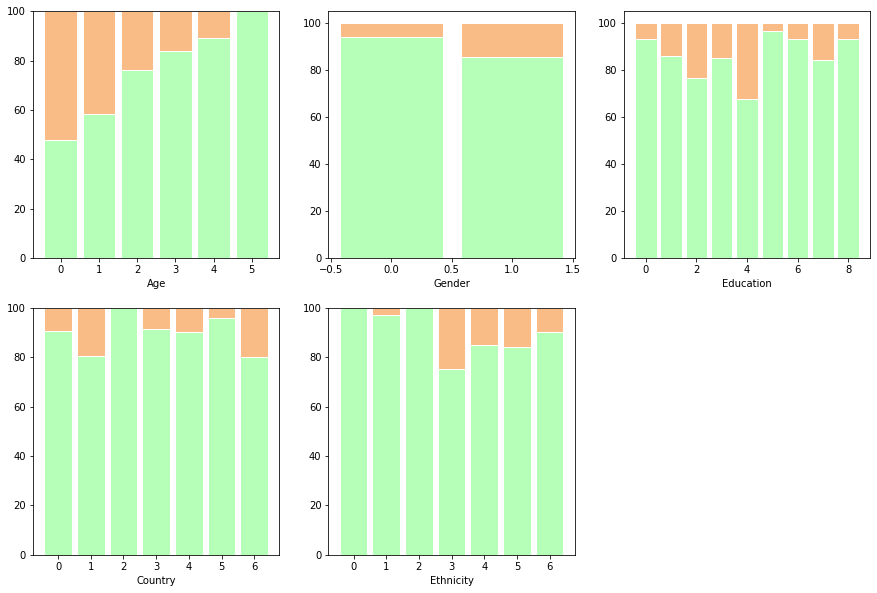

In [267]:
# plot
barWidth = 0.85

#names_age = ('18-24','25-34','35-44','45-54','55-64','65+')
#names_gender = ('Female','Male')
#names_education = ('LSB16y','LSA16y','LSA17y','LSA18y','SCU','PC','UD','MD','DD')
#names_country = ('Australia','Canada','New Zealand','Other','Republic of Ireland','UK','USA')
#names_ethnicity = ('Asian','Black','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black','Other','White')

fig = plt.figure(figsize=(15,10))

ax_age = fig.add_subplot(231)
ax_gender = fig.add_subplot(232)
ax_education = fig.add_subplot(233)
ax_country = fig.add_subplot(234)
ax_ethnicity = fig.add_subplot(235)

ax_age.bar(age_r, age_cat1, color='#b5ffb9', edgecolor='white', width=barWidth)
ax_age.bar(age_r, age_cat2, bottom=age_cat1, color='#f9bc86', edgecolor='white', width=barWidth)
#ax_age.set_xticks([0.05,1,1.95,2.9,3.9,5])
#ax_age.set_xticklabels(names_age)
ax_age.set_xlabel("Age")

ax_gender.bar(gender_r, gender_cat1, color='#b5ffb9', edgecolor='white', width=barWidth)
ax_gender.bar(gender_r, gender_cat2, bottom=gender_cat1, color='#f9bc86', edgecolor='white', width=barWidth)
#ax_gender.set_xticks([0.05,1])
#ax_gender.set_xticklabels(names_gender)
ax_gender.set_xlabel("Gender")

ax_education.bar(education_r, education_cat1, color='#b5ffb9', edgecolor='white', width=barWidth)
ax_education.bar(education_r, education_cat2, bottom=education_cat1, color='#f9bc86', edgecolor='white', width=barWidth)
#ax_education.set_xticks([0.05,1,1.95,2.9,3,4,5,6,7])
#ax_education.set_xticklabels(['A','B','C','D','F','G','H','I','J'])
ax_education.set_xlabel("Education")

ax_country.bar(country_r, country_cat1, color='#b5ffb9', edgecolor='white', width=barWidth)
ax_country.bar(country_r, country_cat2, bottom=country_cat1, color='#f9bc86', edgecolor='white', width=barWidth)
ax_country.set_xlabel("Country")

ax_ethnicity.bar(ethnicity_r, ethnicity_cat1, color='#b5ffb9', edgecolor='white', width=barWidth)
ax_ethnicity.bar(ethnicity_r, ethnicity_cat2, bottom=ethnicity_cat1, color='#f9bc86', edgecolor='white', width=barWidth)
ax_ethnicity.set_xlabel("Ethnicity")



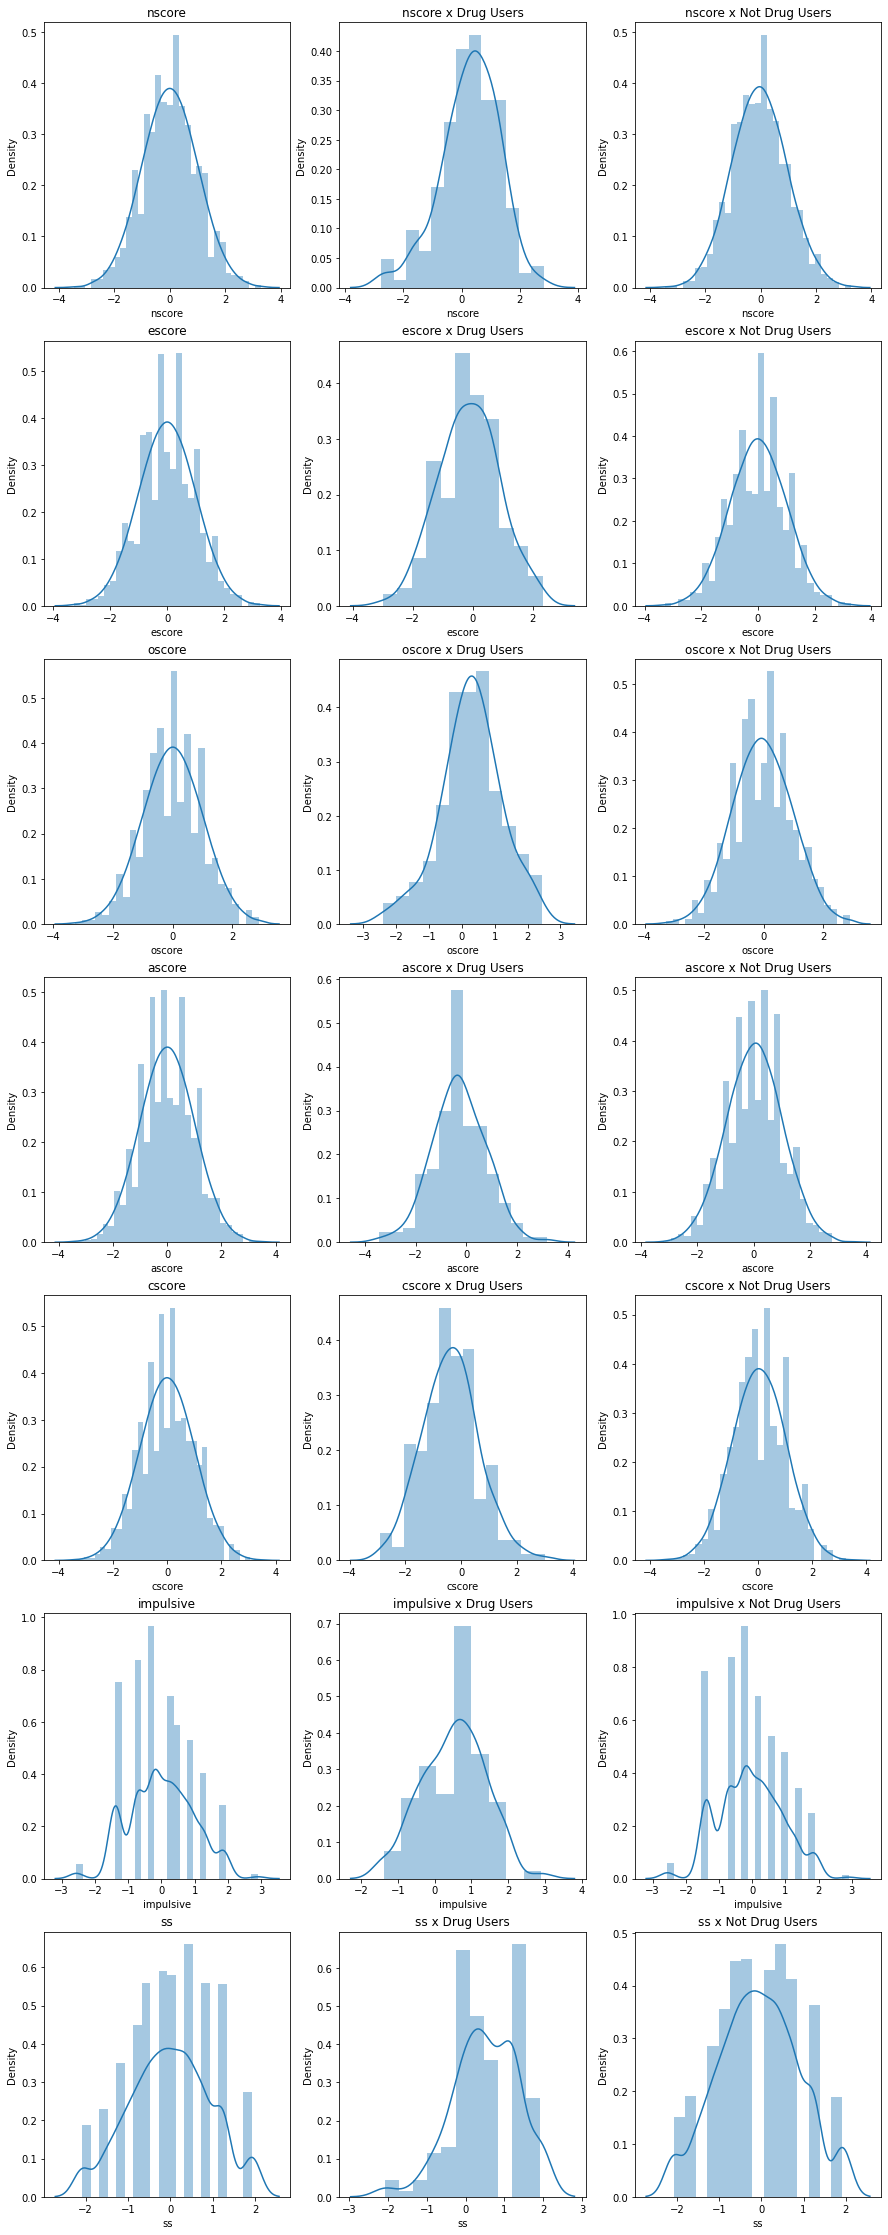

In [250]:
warnings.filterwarnings('ignore')

# Determine the size of the graphs
plt.figure(figsize=(15,40))

plt.subplot(7,3,1)
sns.distplot(df['nscore']).set_title('nscore')
plt.subplot(7,3,2)
sns.distplot(df['nscore'].loc[df['crack_'].isin(['Sim'])]).set_title('nscore x Drug Users')
plt.subplot(7,3,3)
sns.distplot(df['nscore'].loc[df['crack_'].isin(['Não'])]).set_title('nscore x Not Drug Users')

plt.subplot(7,3,4)
sns.distplot(df['escore']).set_title('escore')
plt.subplot(7,3,5)
sns.distplot(df['escore'].loc[df['crack_'].isin(['Sim'])]).set_title('escore x Drug Users')
plt.subplot(7,3,6)
sns.distplot(df['escore'].loc[df['crack_'].isin(['Não'])]).set_title('escore x Not Drug Users')

plt.subplot(7,3,7)
sns.distplot(df['oscore']).set_title('oscore')
plt.subplot(7,3,8)
sns.distplot(df['oscore'].loc[df['crack_'].isin(['Sim'])]).set_title('oscore x Drug Users')
plt.subplot(7,3,9)
sns.distplot(df['oscore'].loc[df['crack_'].isin(['Não'])]).set_title('oscore x Not Drug Users')

plt.subplot(7,3,10)
sns.distplot(df['ascore']).set_title('ascore')
plt.subplot(7,3,11)
sns.distplot(df['ascore'].loc[df['crack_'].isin(['Sim'])]).set_title('ascore x Drug Users')
plt.subplot(7,3,12)
sns.distplot(df['ascore'].loc[df['crack_'].isin(['Não'])]).set_title('ascore x Not Drug Users')

plt.subplot(7,3,13)
sns.distplot(df['cscore']).set_title('cscore')
plt.subplot(7,3,14)
sns.distplot(df['cscore'].loc[df['crack_'].isin(['Sim'])]).set_title('cscore x Drug Users')
plt.subplot(7,3,15)
sns.distplot(df['cscore'].loc[df['crack_'].isin(['Não'])]).set_title('cscore x Not Drug Users')

plt.subplot(7,3,16)
sns.distplot(df['impulsive']).set_title('impulsive')
plt.subplot(7,3,17)
sns.distplot(df['impulsive'].loc[df['crack_'].isin(['Sim'])]).set_title('impulsive x Drug Users')
plt.subplot(7,3,18)
sns.distplot(df['impulsive'].loc[df['crack_'].isin(['Não'])]).set_title('impulsive x Not Drug Users')

plt.subplot(7,3,19)
sns.distplot(df['ss']).set_title('ss')
plt.subplot(7,3,20)
sns.distplot(df['ss'].loc[df['crack_'].isin(['Sim'])]).set_title('ss x Drug Users')
plt.subplot(7,3,21)
sns.distplot(df['ss'].loc[df['crack_'].isin(['Não'])]).set_title('ss x Not Drug Users')

plt.show()
warnings.filterwarnings(action='once')